# Utils

In [99]:
# import stuff here
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import boto3
import pandas as pd
from sagemaker import get_execution_role

def list_data(folder):
    """
    List all available data sets in the folder
    
    """
    s3 = boto3.resource('s3')
    bucket='cp-hackathon-data'
    hackathon_data = s3.Bucket(bucket)
    keys = []
    for obj in hackathon_data.objects.filter(Prefix=folder):
        keys.append(obj.key)
    return keys
def get_data(key):
    role = get_execution_role()
    bucket='cp-hackathon-data'
    data_location = 's3://{}/{}'.format(bucket, key)
    return pd.read_csv(data_location)

In [2]:
list_data('RedCross')

['RedCross/',
 'RedCross/ovitrap_data.csv',
 'RedCross/ovitrap_data_monthly_province.csv',
 'RedCross/weather_data_monthly_province.csv']

# Importing weather DataFrame

In [123]:
weather = get_data('RedCross/weather_data_monthly_province.csv').sort_values(['adm_level', 'date'])

Couldn't call 'get_role' to get Role ARN from role name cp-sagemaker-hackathon-role to get Role path.


In [124]:
weather.head()

,adm_level,date,JAXA_GPM_L3_GSMaP_v6_operational_hourlyPrecipRateGC,MODIS_006_MOD11A1_LST_Day_1km,MODIS_006_MOD11A1_LST_Night_1km,MODIS_006_MYD13A1_EVI,NASA_FLDAS_NOAH01_C_GL_M_V001_Qair_f_tavg,NASA_FLDAS_NOAH01_C_GL_M_V001_Rainf_f_tavg,NASA_FLDAS_NOAH01_C_GL_M_V001_SoilMoi00_10cm_tavg,NASA_FLDAS_NOAH01_C_GL_M_V001_SoilTemp00_10cm_tavg,NASA_FLDAS_NOAH01_C_GL_M_V001_Tair_f_tavg,NASA_FLDAS_NOAH01_C_GL_M_V001_Wind_f_tavg
0,Abra,2012-06-01,0.430867,15043.5540,14639.858,4180.8150,0.016763,0.000172,0.425508,296.31796,297.09457,4.977150
1,Abra,2012-07-01,0.373154,15020.1080,14632.604,3662.6284,0.016362,0.000186,0.428822,295.84708,296.72488,3.478785
2,Abra,2012-08-01,0.620665,14917.0320,14486.046,3183.5750,0.016541,0.000245,0.432180,295.66570,296.15265,6.328744
3,Abra,2012-09-01,0.106620,14980.0205,14696.892,4785.5340,0.015967,0.000099,0.419719,296.26144,296.81122,3.009687
4,Abra,2012-10-01,0.053113,14986.9280,14666.716,4770.0083,0.014127,0.000039,0.390687,295.36737,295.53925,4.924677


# Rename the columns

In [125]:
weather.rename(mapper={
    'JAXA_GPM_L3_GSMaP_v6_operational_hourlyPrecipRateGC':'jaxa_rainfall',
    'MODIS_006_MOD11A1_LST_Day_1km': 'land_surface_temperature_day',
    'MODIS_006_MYD13A1_EVI':'vegetation_index',
    'MODIS_006_MOD11A1_LST_Night_1km': 'land_surface_temperature_night',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Qair_f_tavg': 'specific_humidity',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Rainf_f_tavg': 'fldas_rainfall',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_SoilMoi00_10cm_tavg': 'soil_moisture',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_SoilTemp00_10cm_tavg': 'soil_temperature',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Tair_f_tavg': 'air_temperature',
    'NASA_FLDAS_NOAH01_C_GL_M_V001_Wind_f_tavg': 'wind_speed'
                      },
               axis=1,
               inplace=True)

# Change type of date column

In [128]:
weather['date'] = pd.to_datetime(weather['date']).dt.date

In [129]:
weather.shape

(6873, 12)

In [130]:
weather.describe()

,jaxa_rainfall,land_surface_temperature_day,land_surface_temperature_night,vegetation_index,specific_humidity,fldas_rainfall,soil_moisture,soil_temperature,air_temperature,wind_speed
count,6873.000000,6865.000000,6780.000000,6873.000000,6794.000000,6.789000e+03,6794.000000,6794.000000,6794.000000,6794.000000
mean,0.086979,15083.833196,14732.646723,4440.147675,0.016440,8.814848e-05,0.372309,298.244164,298.417811,4.636927
std,0.091355,146.513899,99.953498,839.550436,0.001409,6.713168e-05,0.059160,2.058478,1.846001,1.583416
min,0.000000,14647.812500,13109.000000,594.618840,0.009271,1.095434e-07,0.153724,289.207000,288.679400,1.787517
25%,0.025676,14996.101000,14686.327000,4080.070800,0.015718,3.872740e-05,0.347887,297.212817,297.567623,3.422727
50%,0.061672,15065.449000,14745.820000,4562.127000,0.016677,7.695034e-05,0.395176,298.266665,298.762160,4.354069
75%,0.116049,15134.880000,14795.490000,4969.701000,0.017446,1.202518e-04,0.414963,299.186415,299.638588,5.661308
max,0.885880,15795.163000,15049.094000,6578.051000,0.019830,6.109239e-04,0.440366,306.511900,303.114500,12.215397


In [131]:
weather.date.min()

datetime.date(2012, 6, 1)

In [19]:
weather.date.max()

'2018-12-01'

In [48]:
weather.adm_level.unique()

array(['Abra', 'Agusan del Norte', 'Agusan del Sur', 'Aklan', 'Albay',
       'Antique', 'Apayao', 'Aurora', 'Basilan', 'Bataan', 'Batanes',
       'Batangas', 'Benguet', 'Biliran', 'Bohol', 'Bukidnon', 'Bulacan',
       'Cagayan', 'Camarines Norte', 'Camarines Sur', 'Camiguin', 'Capiz',
       'Catanduanes', 'Cavite', 'Cebu', 'City of Isabela',
       'Compostela Valley', 'Cotabato', 'Cotabato City',
       'Davao Occidental', 'Davao Oriental', 'Davao del Norte',
       'Davao del Sur', 'Dinagat Islands', 'Eastern Samar', 'Guimaras',
       'Ifugao', 'Ilocos Norte', 'Ilocos Sur', 'Iloilo', 'Isabela',
       'Kalinga', 'La Union', 'Laguna', 'Lanao del Norte',
       'Lanao del Sur', 'Leyte', 'Maguindanao', 'Marinduque', 'Masbate',
       'Misamis Occidental', 'Misamis Oriental', 'Mountain Province',
       'NCR, City of Manila, First District', 'NCR, Fourth District',
       'NCR, Second District', 'NCR, Third District', 'Negros Occidental',
       'Negros Oriental', 'Northern Samar', 

In [8]:
len(weather.adm_level.unique())

87

# Missing data

In [58]:
weather.isnull().sum()

adm_level                          0
date                               0
jaxa_rainfall                      0
land_surface_temperature_day       8
land_surface_temperature_night    93
vegetation_index                   0
specific_humidity                 79
fldas_rainfall                    84
soil_moisture                     79
soil_temperature                  79
air_temperature                   79
wind_speed                        79
dtype: int64

In [95]:
weather[['adm_level', 'date']].loc[weather.land_surface_temperature_day.isnull()].groupby('adm_level').count()

,date
adm_level,
"NCR, City of Manila, First District",2
"NCR, Fourth District",1
"NCR, Second District",2
"NCR, Third District",3


In [60]:
weather[['adm_level', 'date']].loc[weather.land_surface_temperature_night.isnull()].groupby('adm_level').count()

,date
adm_level,
Aklan,2
Bataan,1
Batangas,1
Bulacan,1
Camarines Norte,1
Camiguin,4
Capiz,1
Cavite,1
City of Isabela,3


In [61]:
weather[['adm_level', 'date']].loc[weather.specific_humidity.isnull()].groupby('adm_level').count()

,date
adm_level,
"NCR, City of Manila, First District",79


In [62]:
weather[['adm_level', 'date']].loc[weather.fldas_rainfall.isnull()].groupby('adm_level').count()

,date
adm_level,
La Union,1
"NCR, City of Manila, First District",79
Tarlac,1
Zambales,3


In [63]:
weather[['adm_level', 'date']].loc[weather.soil_moisture.isnull()].groupby('adm_level').count()

,date
adm_level,
"NCR, City of Manila, First District",79


In [64]:
weather[['adm_level', 'date']].loc[weather.soil_temperature.isnull()].groupby('adm_level').count()

,date
adm_level,
"NCR, City of Manila, First District",79


In [65]:
weather[['adm_level', 'date']].loc[weather.air_temperature.isnull()].groupby('adm_level').count()

,date
adm_level,
"NCR, City of Manila, First District",79


In [36]:
weather[['adm_level', 'date']].loc[weather.wind_speed.isnull()].groupby('adm_level').count()

,date
adm_level,
"NCR, City of Manila, First District",79


In [133]:
weather[['adm_level', 'date']].loc[weather.vegetation_index.isnull()].groupby('adm_level').count()

,date
adm_level,


# Distributions
Comparing the distribution of features in Basilan (low mosquito abundance) and Pangansinan (high mosquito abundance)

In [96]:
weather.head(1)

,adm_level,date,jaxa_rainfall,land_surface_temperature_day,land_surface_temperature_night,vegetation_index,specific_humidity,fldas_rainfall,soil_moisture,soil_temperature,air_temperature,wind_speed
0,Abra,2012-06-01,0.430867,15043.554,14639.858,4180.815,0.016763,0.000172,0.425508,296.31796,297.09457,4.97715


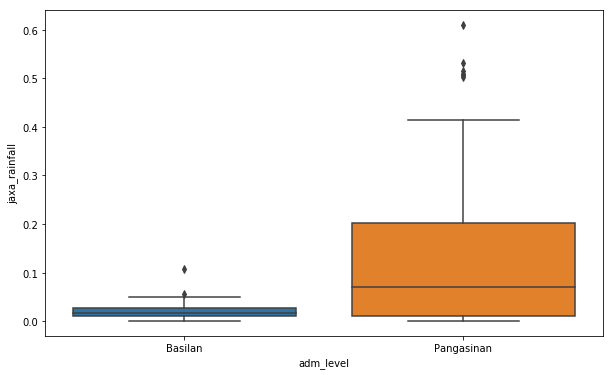

In [71]:
sns.set_context({"figure.figsize": (10, 6)})
sns.boxplot(x='adm_level', y='jaxa_rainfall', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

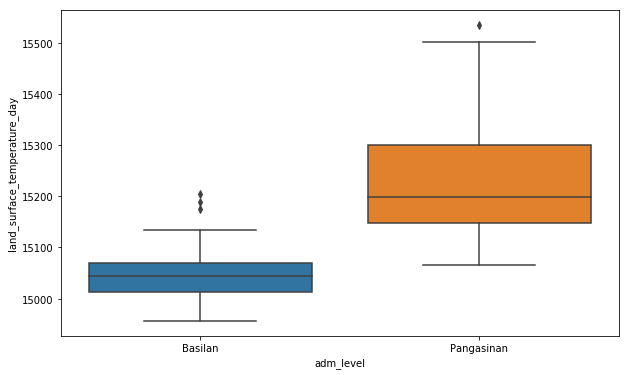

In [73]:
sns.boxplot(x='adm_level', y='land_surface_temperature_day', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

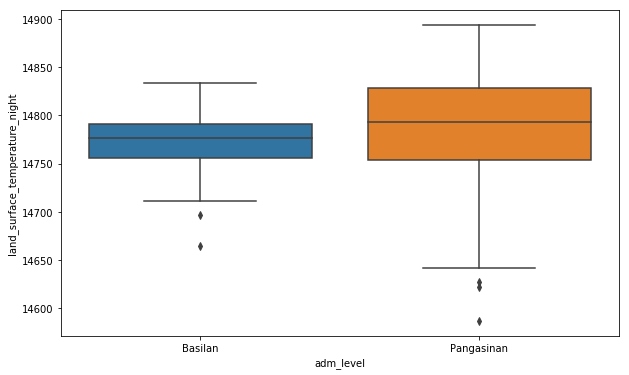

In [74]:
sns.boxplot(x='adm_level', y='land_surface_temperature_night', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

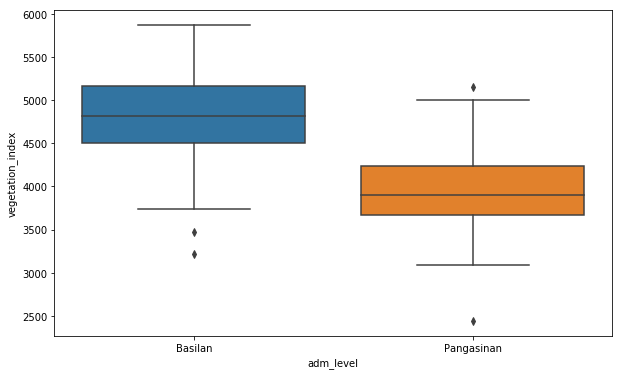

In [75]:
sns.boxplot(x='adm_level', y='vegetation_index', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

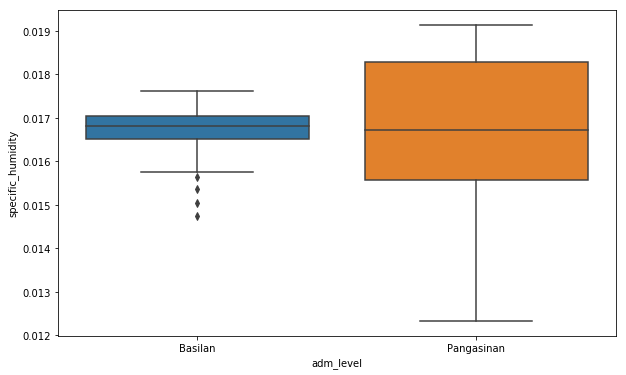

In [82]:
sns.boxplot(x='adm_level', y='specific_humidity', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

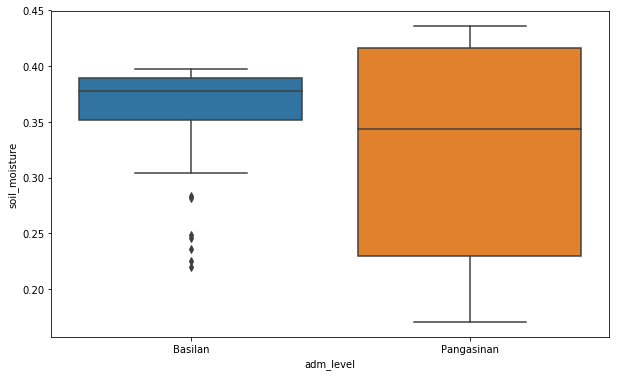

In [83]:
sns.boxplot(x='adm_level', y='soil_moisture', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

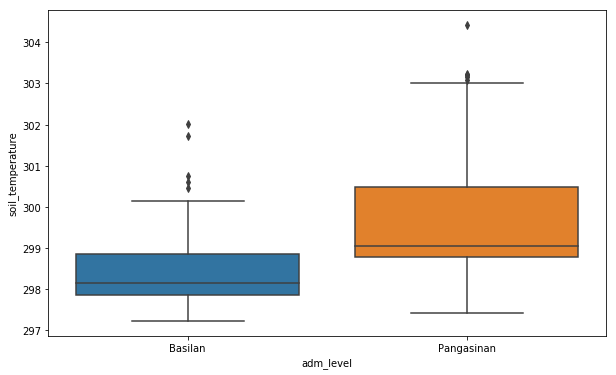

In [84]:
sns.boxplot(x='adm_level', y='soil_temperature', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

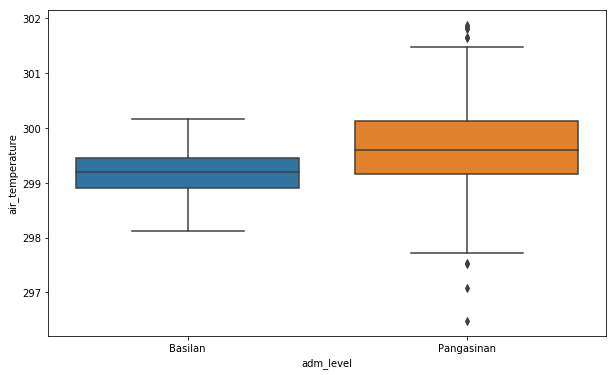

In [85]:
sns.boxplot(x='adm_level', y='air_temperature', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

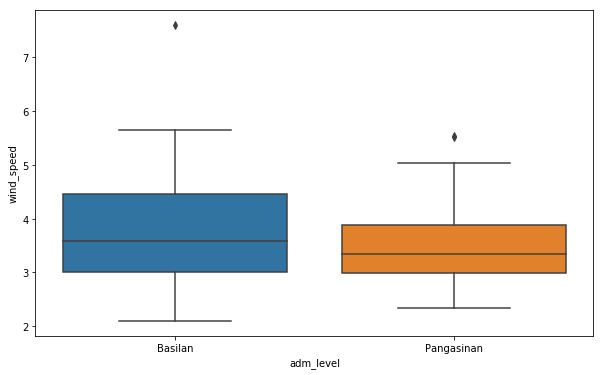

In [86]:
sns.boxplot(x='adm_level', y='wind_speed', data=weather.loc[weather.adm_level.isin(['Basilan', 'Pangasinan'])])

# Time series view

In [112]:
weather.head(1)

,adm_level,date,jaxa_rainfall,land_surface_temperature_day,land_surface_temperature_night,vegetation_index,specific_humidity,fldas_rainfall,soil_moisture,soil_temperature,air_temperature,wind_speed
0,Abra,2012-06-01,0.430867,15043.554,14639.858,4180.815,0.016763,0.000172,0.425508,296.31796,297.09457,4.97715


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text xticklabel objects>)

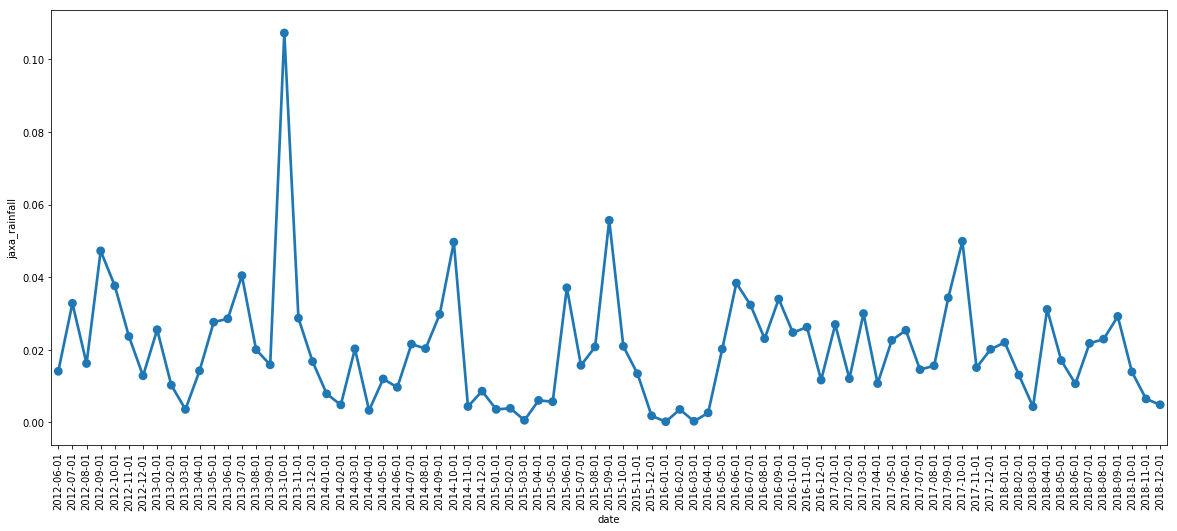

In [132]:
sns.set_context({"figure.figsize": (20, 8)})
sns.pointplot(x='date', y='jaxa_rainfall', data=weather.loc[weather.adm_level == 'Basilan'])
plt.xticks(rotation=90)